# Data Scientist Nanodegree
## Supervised Learning
## Project: regression for RADIATION_US

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
import pathlib

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds

# LOADING THE DATASET RADON FROM TENSORFLOW

In [4]:
data = tfds.load('radon' , split ='train')

Shuffling and writing examples to /root/tensorflow_datasets/radon/1.0.0.incomplete6YZ9AV/radon-train.tfrecord


Dataset radon downloaded and prepared to /root/tensorflow_datasets/radon/1.0.0. Subsequent calls will reuse this data.


# SELECTING ONLY THE STATE = MN 

In [5]:
state = 'MN' # Minosoata 
radon_data = tfds.as_dataframe(data)
radon_data.rename(lambda s: s[9:] if s.startswith('feat') else s, axis=1, inplace=True)
df = radon_data.copy(deep=True) #radon_data[radon_data.state==state.encode()].copy()

# VISUALIZING  THE DATAFRAME

In [6]:
df.head(1)

,activity,Uppm,adjwt,basement,cntyfips,county,dupflag,floor,idnum,lat,lon,pcterr,region,rep,room,startdt,starttm,state,state2,stfips,stopdt,stoptm,stratum,typebldg,wave,windoor,zip,zipflag
0,1.6,2.49759,292.219543,b'N',3,b'ALLEN ',0,1,1681,41.091,-85.067001,12.7,2,3,2,11489,2230,b'IN',b'IN',18,11689,2235,2,1,92,b' ',46835,0


# INFO  ON DATA-TYPES

In [7]:
#radon_data.info()

In [8]:
#df.info()

- there are 4  contineous values features and 9 categoriacal features and in total there are 45222 rows and 14 cols.
- 4.6 mb data
- dependent value id income, which is categoriacal  non qantitative. <=50K or >50K class. 
- so binary class problem.


# STATISTICS OF CONTINEOUS INDEPENDENT VARIABLES: 

In [9]:
#df.describe()

# STATISTICS OF CATEGORICAL VARIABLE FEATURES: 

In [10]:
#df.describe(include = np.object).transpose()

# NUMBERS OF THE MISSING NO OF VARIABLES :

In [11]:
#df.isnull().sum()

# DISTRIBUTION OF DEPENDENT VARIABLE :

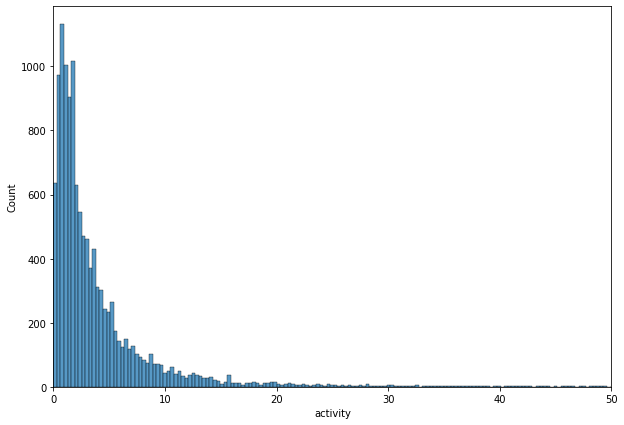

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(10,7))
#histogram
plt.xlim(0, 50)
sns.histplot(df['activity']);

- most of  them lies within 1 and 10 level in activity

# CO-RELATION  MATRIX BETWEEN DIFFERNT FEATURES :

In [13]:
import matplotlib.pyplot as plt

#correlation matrix
#corrmat = df.corr()
#f, ax = plt.subplots(figsize=(10, 7))
#sns.heatmap(corrmat, vmax=1,vmin=-1 ,square=True , annot=True);

# RELATIONSHIPS BETWEEN THE DIFFERNT FEATURES WITH REACH OTHER :(BOTH CATEGORICAL & CONTINEOUS):

In [14]:
sns.set()
#cols = list(df.columns[10:14])
#sns.pairplot(df[cols], height = 3)
#plt.show();

In [15]:
#df.hist(figsize=(10, 12), bins=30, xlabelsize=8, ylabelsize=8,legend = True); # ; avoid having the matplotlib verbose informations

### Implementation: Data Exploration


** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [16]:
# TODO: Total number of records
data = df.copy(deep=True)
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
low = len(data[data['activity'] <= 4])

## TODO: Number of records where individual's income is at most $50,000
##medium = len(data[(data['activity'] > 4) & (data['activity'] < 8 )])

# TODO: Number of records where individual's income is more than $50,000
high = len(data[data['activity'] > 4])


# TODO: Percentage of individuals whose income is more than $50,000
very_percent = 100*(high/n_records)

# Print the results
print("Total number of records             : {}".format(n_records))
print("Individuals high               : {}".format(high))
print("Individuals low                     : {}".format(low))

print("Percentage of high                  : {}%".format(100*high/n_records))
#print("Percentage of medium                : {}%".format(100*medium/n_records))
print("Percentage of low                   : {}%".format(100*low/n_records))

Total number of records             : 12573
Individuals high               : 3780
Individuals low                     : 8793
Percentage of high                  : 30.064423765211167%
Percentage of low                   : 69.93557623478884%


# ** Featureset Exploration **

#     Label
- 'activity': tf.float32,

#    'features':

- 'Uppm': tf.float32,
- 'adjwt': tf.float32,
- 'basement': tf.string,
- 'cntyfips': tf.int32,
- 'county': tf.string,
- 'dupflag': tf.int32,
- 'floor': tf.int32,
- 'idnum': tf.int32,
- 'lat': tf.float32,
- 'lon': tf.float32,
- 'pcterr': tf.float32,
- 'region': tf.int32,
- 'rep': tf.int32,
- 'room': tf.int32,
- 'startdt': tf.int32,
- 'starttm': tf.int32,
- 'state': tf.string,
- 'state2': tf.string,
- 'stfips': tf.int32,
- 'stopdt': tf.int32,
- 'stoptm': tf.int32,
- 'stratum': tf.int32,
- 'typebldg': tf.int32,
- 'wave': tf.int32,
- 'windoor': tf.string,
- 'zip': tf.int32,
- 'zipflag': tf.int32,

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

In [17]:
df['radiation'] = df['activity']

In [18]:
df['radiation'] = np.where(df['activity'] <=4 , "low" , df['radiation'])

In [19]:
#df['radiation']  = np.where((df['activity'] > 4) & (df['activity'] < 8), "medium" , df['radiation'])

In [20]:
df['radiation']  = np.where(df['activity'] > 4, "high" , df['radiation'])

In [21]:
df['radiation'].unique()

array(['low', 'high'], dtype=object)

In [22]:
# Split the data into features and target label

income_raw = df['radiation']

features_raw = df.drop(['activity','radiation','county' , 'state', 'state2'], axis = 1)

# Visualize skewed continuous features of original data
#vs.distribution(data)

In [23]:
df.describe(include = np.object)

,basement,county,state,state2,windoor,radiation
count,12573,12573,12573,12573,12573,12573
unique,4,386,8,9,1,2
top,b'Y',b'MARICOPA ',b'PA',b'PA',b' ',low
freq,8469,765,2389,2389,12573,8793


For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

In [24]:
#features_raw.columns

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [25]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = [ 'Uppm', 'adjwt', 'cntyfips', 'dupflag', 'floor',
       'idnum', 'lat', 'lon', 'pcterr', 'region', 'rep', 'room', 'startdt',
       'starttm', 'stfips', 'stopdt', 'stoptm', 'stratum',
       'typebldg', 'wave' , 'zip', 'zipflag']

features_log_minmax_transform = pd.DataFrame(data = features_raw)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
#features_log_minmax_transform = features_log_minmax_transform.drop(['stfips','state2'] , axis =1)

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,Uppm,adjwt,basement,cntyfips,dupflag,floor,idnum,lat,lon,pcterr,region,rep,room,startdt,starttm,stfips,stopdt,stoptm,stratum,typebldg,wave,windoor,zip,zipflag
0,0.662995,0.122800,b'N',0.003929,0.0,0.111111,0.131497,0.553242,0.661277,0.025897,0.1,0.666667,0.285714,0.011513,0.945316,0.274510,0.013283,0.947435,0.035714,0.2,0.659574,b' ',0.541375,0.0
1,0.707507,0.153587,b'N',0.047151,0.0,0.111111,0.113964,0.177801,0.032614,0.000000,0.1,1.000000,0.285714,0.110619,0.353116,0.000000,0.112389,0.428148,0.035714,0.2,0.404255,b' ',0.997838,0.0
2,0.645964,0.264311,b'Y',0.031434,0.0,0.000000,0.330542,0.633871,0.974041,0.019780,0.5,0.333333,0.285714,0.195575,0.423908,0.411765,0.197345,0.423908,0.000000,0.2,0.170213,b' ',0.020563,0.0
3,0.645964,0.240629,b'N',0.031434,0.0,0.111111,0.320366,0.633871,0.974041,0.056281,0.5,0.666667,0.428571,0.197345,0.296736,0.411765,0.199115,0.508690,0.000000,0.2,0.446809,b' ',0.016564,0.0
4,0.559606,0.179761,b'Y',0.184676,0.0,0.000000,0.536005,0.432761,0.449031,0.047920,0.0,0.666667,0.571429,0.195575,0.256465,0.490196,0.197345,0.258584,0.035714,0.2,0.652482,b' ',0.741334,0.0


In [26]:
features_log_minmax_transform.describe(include=np.object).transpose()

,count,unique,top,freq
basement,12573,4,b'Y',8469
windoor,12573,1,b' ',12573


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [27]:
# import preprocessing from sklearn
from sklearn import preprocessing


# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_log_minmax_transform = features_log_minmax_transform#.drop('Description', axis = 1)
features_final = pd.get_dummies(data= features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
#income = pd.get_dummies(data=)
multi_label = preprocessing.LabelEncoder()
multi_label = multi_label.fit(income_raw)
income = multi_label.transform(income_raw)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(encoded)


27 total features after one-hot encoding.


In [28]:
#print(encoded)

In [29]:
#features_final.head(2)

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [30]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.4, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 7543 samples.
Testing set has 5030 samples.


In [31]:
X_train.shape , y_train.shape

((7543, 27), (7543,))

In [32]:
labeling = y_train

In [33]:
labeling[:20]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# BASE LINE MODEL

In [34]:

TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = len(income) - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

print("TP {} , FP {} , TN 0 , TN 0".format(TP , FP))

# TODO: Calculate accuracy, precision and recall
accuracy = TP + TN / (TP + TN + FP + FN)
recall = TP /(TP + FN)
precision =TP /(TP + FP) 

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore =(1+np.square(0.5)) * precision * recall/((np.square(0.5)*precision)+recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {}, F-score: {}]".format(accuracy, fscore))

TP 8793 , FP 3780 , TN 0 , TN 0
Naive Predictor: [Accuracy score: 8793.0, F-score: 0.7440974866717441]


# VARIOUS MACHINE LEARNING CLASSIFIERS

In [37]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    #pipe = Pipeline([('pca', PCA(n_components=20)),
    #                ('clf', learner)])

    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])

    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    results['predictions_train'] = predictions_train
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(predictions_train, y_train[:300])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] =  accuracy_score(predictions_test, y_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train,pos_label=1,average='binary',beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,pos_label=1,average='binary' ,beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

#TRAINING OF THE CLASSIFIERS

GradientBoostingClassifier trained on 75 samples.
GradientBoostingClassifier trained on 754 samples.
GradientBoostingClassifier trained on 7543 samples.
RandomForestClassifier trained on 75 samples.
RandomForestClassifier trained on 754 samples.
RandomForestClassifier trained on 7543 samples.
AdaBoostClassifier trained on 75 samples.
AdaBoostClassifier trained on 754 samples.
AdaBoostClassifier trained on 7543 samples.


/content/visuals.py:121: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


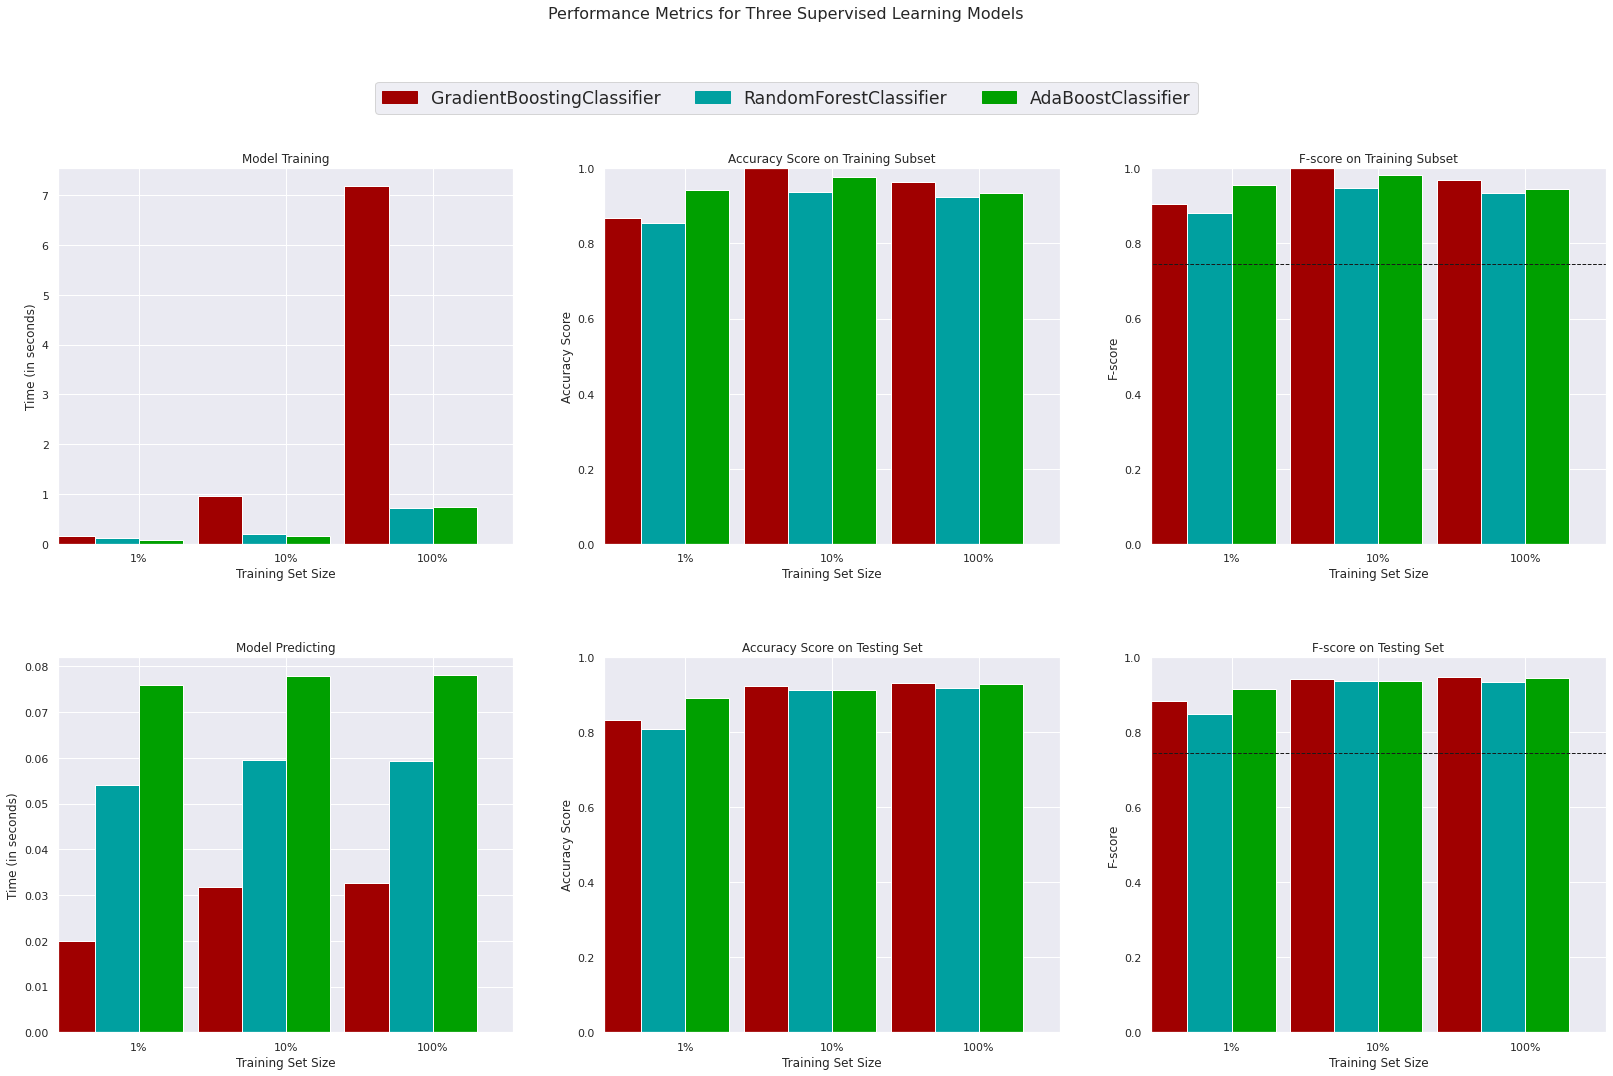

In [41]:
# TODO: Import the three supervised learning models from sklearn

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier



# TODO: Initialize the three models
clf_A = GradientBoostingClassifier(random_state=42 , n_estimators=300,max_depth=3 , learning_rate=0.1)
clf_B = RandomForestClassifier(n_estimators=100 , max_depth=5)
clf_C = AdaBoostClassifier(n_estimators=60, learning_rate = 1.0)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)



samples_100 = len(y_train)
samples_10 = int(0.1 * samples_100)
samples_1 =  int(0.01 * samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen

vs.evaluate(results, accuracy, fscore)

# HYPERPARAMETER SEARCH FOR A ALGO

In [82]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# TODO: Initialize the classifier
clf = GradientBoostingClassifier( random_state=42,learning_rate=0.1)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'n_': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators' :[400, 300] , 'max_depth':[3,5] }

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, average = 'binary' , pos_label =1, beta =0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train , y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)



#  Evaluation of test data :

In [83]:
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(f1_score(y_test, predictions,average='binary', pos_label=1)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions,average='binary', pos_label =1)))

Unoptimized model
------
Accuracy score on testing data: 0.9274
F-score on testing data: 0.9485

Optimized Model
------
Final accuracy score on the testing data: 0.9292
Final F-score on the testing data: 0.9498


# CLASSIFICATION REPORT

In [84]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

clf_report = classification_report(y_test,
                                   best_predictions,
                                   target_names=['high' , 'low'],
                                   output_dict=True)

# .iloc[:-1, :] to exclude support
#sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, linewidths=0.5, ax)

#print(classification_report(y_test, best_predictions, target_names=['high radiation' , 'low radiation']))

# EXTRACTING  THE FEATURE IMPORTANCE:

In [85]:
def plot_feature_importance(best_clf , features_final):
    importances  = best_clf.feature_importances_*100
    sort_index =  np.argsort(importances)[::-1]
    x = range(len(importances))
  
    labels = (features_final.columns)[sort_index]    
    return importances , sort_index , x , labels


In [86]:
importances , sort_index , x , labels = plot_feature_importance(best_clf , features_final)

# PLOTTING THE SOME METRICS
- ROC
- CONFIUSION MATRIX
- CLASSIFICATION REPORT
-FEATURE IMPORTANCES

Text(0.5, 1.0, 'FEATURE IMPORTANCE OF THE CLASSIFIER')

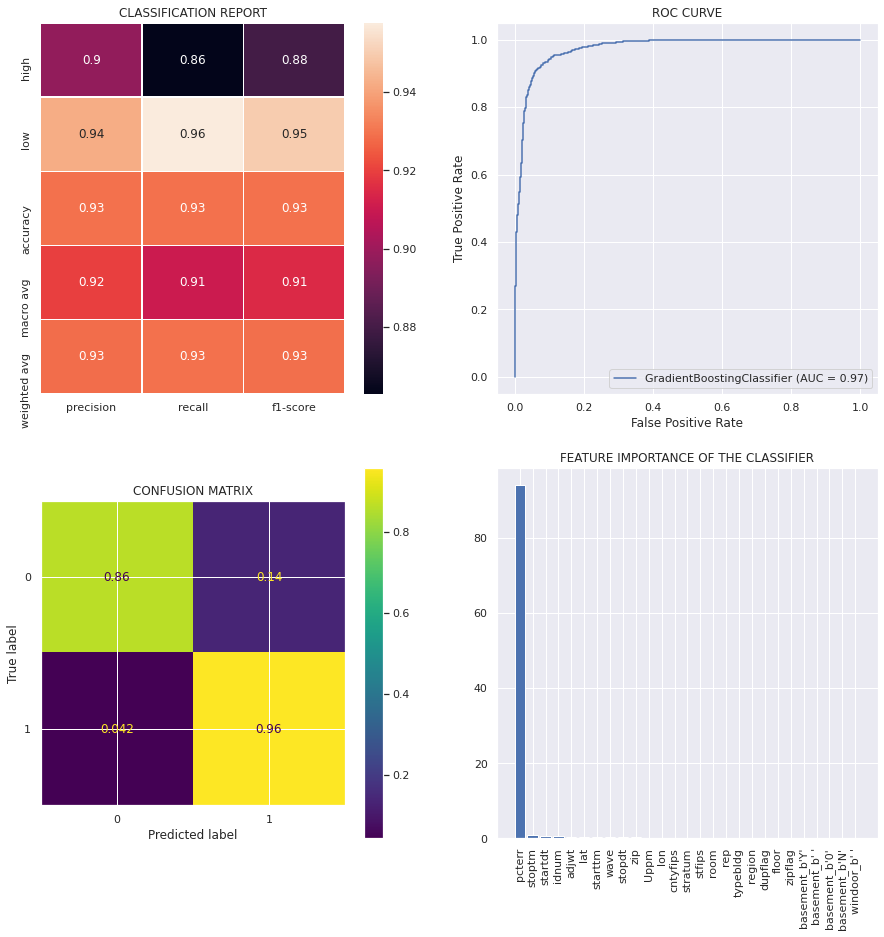

In [87]:



fig, axs = plt.subplots(2, 2, figsize =(15,15))
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, linewidths=0.5, ax=axs[0, 0] )
plot_roc_curve(best_clf , X_test, y_test, ax= axs[0,1])
plot_confusion_matrix(best_clf, X_test, y_test , normalize='true' , ax= axs[1,0]) 
axs[1,1].bar(x , importances[sort_index] , tick_label = labels )
plt.xticks(rotation =90) 

axs[0, 0].set_title('CLASSIFICATION REPORT')

axs[0, 1].set_title('ROC CURVE')

axs[1, 0].set_title('CONFUSION MATRIX')

axs[1, 1].set_title('FEATURE IMPORTANCE OF THE CLASSIFIER')






# FEATURE IMPORTANCE OF THE THE CLASSIFIER

In [ ]:
importances  = best_clf.feature_importances_*100
sort_index =  np.argsort(importances)[::-1]
x = range(len(importances))
plt.figure(figsize=(10,10))
labels = (features_final.columns)[sort_index]
plt.bar(x , importances[sort_index] , tick_label = labels )
plt.xticks(rotation =90)
plt.show()

# PCA AND TNSE IMPLEMENTATION

In [ ]:


import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

def tnse_pipeline(X_train , pca_componts =2 , tnse_components= 2 , perplex = 50.0):

      pca = PCA(n_components= pca_componts)#pca_componts)
      components = pca.fit_transform(X_train)

      total_var = pca.explained_variance_ratio_.sum() * 100
      print("total amamout of variation : {}".format(total_var))

      labels = {str(i): f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)}

      # The default of 1,000 iterations gives fine results, but I'm training for longer just 
      # out some marginal improvements. NB: This takes almost an hour!

      tsne = TSNE(random_state=1, n_iter=6000, metric="cosine", n_components= tnse_components , perplexity= perplex)
      embs = tsne.fit_transform(X_train)
      tsne_data = np.vstack((embs.T, labeling)).T
      tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))
      # Ploting the result of tsne
      sns.FacetGrid(tsne_df, hue='label', height=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
      plt.show()

      return pca, tsne_df, components


# tNSE VISUALIZATION :

In [ ]:

pca , tnse, components = tnse_pipeline(X_train , pca_componts =20 , tnse_components= 2 , perplex = 60.0)

# PCA VISUALIZATION

In [ ]:
#print(class_names)
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=labeling,
    #title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},

    size_max = 15,
    width =  1024,
    height = 1024
    
)
fig.show()

# PRINCIPAL COMPONETS EXPLAINATIONS OF VARIANCE

In [ ]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

# PRINCIPAL COMPONETS VARIENCE EXPLANATION BY EACH PCs

In [ ]:
# Plot the explained variances
plt.figure(figsize=(60,20))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='red')
plt.xlabel('PCA features')
plt.ylabel('variance %')
#plt.xticks(features)

# More statistics on the PCs

In [ ]:
# get basic info
n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1

df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T

mean_explained_variance = df_explained_variance.iloc[:37,0].mean() # calculate mean explained variance

# DISPLAY info about PCs
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.head(45))
print('-'*40)

PCA Overview
Total: 20 components
----------------------------------------
Mean explained variance: 0.05
----------------------------------------
    explained variance  cumulative
1             0.339092    0.339092
2             0.116067    0.455159
3             0.099920    0.555079
4             0.086983    0.642062
5             0.063928    0.705991
6             0.050190    0.756181
7             0.044621    0.800802
8             0.037192    0.837994
9             0.029595    0.867589
10            0.027206    0.894795
11            0.023233    0.918028
12            0.017055    0.935083
13            0.012597    0.947680
14            0.009442    0.957122
15            0.007541    0.964663
16            0.007094    0.971757
17            0.006329    0.978086
18            0.005434    0.983520
19            0.005027    0.988547
20            0.004572    0.993119
----------------------------------------


In [ ]:
# Store as dataframe and print
df_pca = components
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)  #> (3147, 784)
#df_pca.round(2).head(1)

(827, 20)


In [ ]:
# Principal Components Weights (Eigenvectors)
df_pca_loadings = pd.DataFrame(pca.components_)
print("the pca loading shape: ", df_pca_loadings.shape)
#df_pca_loadings.head()

the pca loading shape:  (20, 111)


In [ ]:
############### DEFINE PARAMS
top_k = 3
#select data based on percentile (top_q) or top-k features
top_q = .50
top_pc = 3
###############

# PCA factor loadings
df_c = pd.DataFrame(pca.components_, columns=features_final.columns).T

print("Factor Loadings for the 1. component \n(explains {0:.2f} of the variance)".format(df_explained_variance.iloc[0,0]))
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values()[:top_k])

Factor Loadings for the 1. component 
(explains 0.15 of the variance)

Top 3 highest
----------------------------------------
startdt                           0.652099
stopdt                            0.645959
county_b'ST LOUIS            '    0.125170
Name: 0, dtype: float64 

Top 3 lowest
----------------------------------------
adjwt                            -0.152749
stratum                          -0.142259
county_b'HENNEPIN            '   -0.122514
Name: 0, dtype: float64


# CORRELATION BETWEEN THE INDEPENDENT VARIABLES AND THE PRINCIPAL COMPONENTS 

In [ ]:
# Plot heatmap
size_yaxis = round(features_final.shape[1]*0.5 )

fig, ax = plt.subplots(figsize=(10,size_yaxis))
sns.heatmap(df_c.iloc[:,:3], annot=True, cmap="YlGnBu", ax=ax, linewidths=0.5)
plt.show()

VISUALIZING THE EFFECT(CORR) OF THE INDEPENDENT VARIABLES ON THE PRINCIPICAL COMPONENTS 
- PC1
- PC2
- PC3

In [ ]:
def pca_results(df, pca, component_no, features_no, show_plot=True):
    
    # Build a dataframe with features_no features capturing most variability
    # for a given component number (component_no)
    pca_comp = pd.DataFrame(np.round(pca.components_, 4), columns=df.keys()).iloc[component_no - 1]
    pca_comp.sort_values(ascending=False, inplace=True)
    pca_comp = pd.concat([pca_comp.head(features_no), pca_comp.tail(features_no)])
    
    if show_plot:
        # Plot the result
        pca_comp.plot(kind='bar', 
                  title='Most {} weighted features for PCA component {}'.format(features_no*2, component_no),
                  figsize=(12, 6))
        plt.show()
    
    return pca_comp

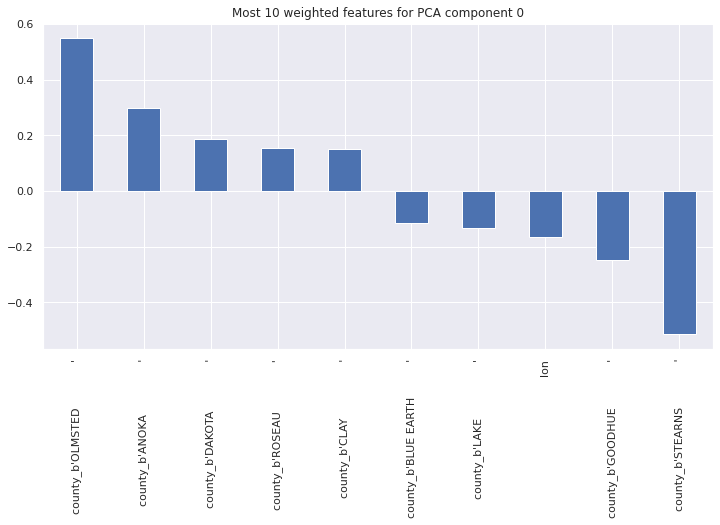

county_b'OLMSTED             '    0.5504
county_b'ANOKA               '    0.2978
county_b'DAKOTA              '    0.1868
county_b'ROSEAU              '    0.1546
county_b'CLAY                '    0.1525
county_b'BLUE EARTH          '   -0.1136
county_b'LAKE                '   -0.1325
lon                              -0.1648
county_b'GOODHUE             '   -0.2490
county_b'STEARNS             '   -0.5145
Name: 19, dtype: float64


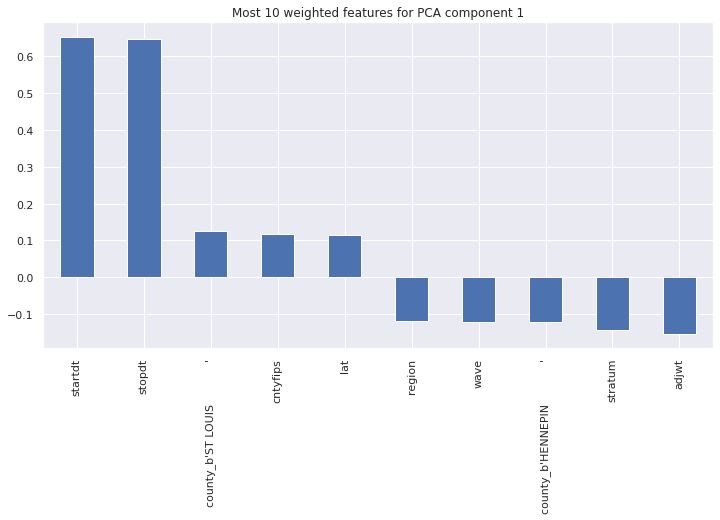

startdt                           0.6521
stopdt                            0.6460
county_b'ST LOUIS            '    0.1252
cntyfips                          0.1186
lat                               0.1161
region                           -0.1190
wave                             -0.1204
county_b'HENNEPIN            '   -0.1225
stratum                          -0.1423
adjwt                            -0.1527
Name: 0, dtype: float64


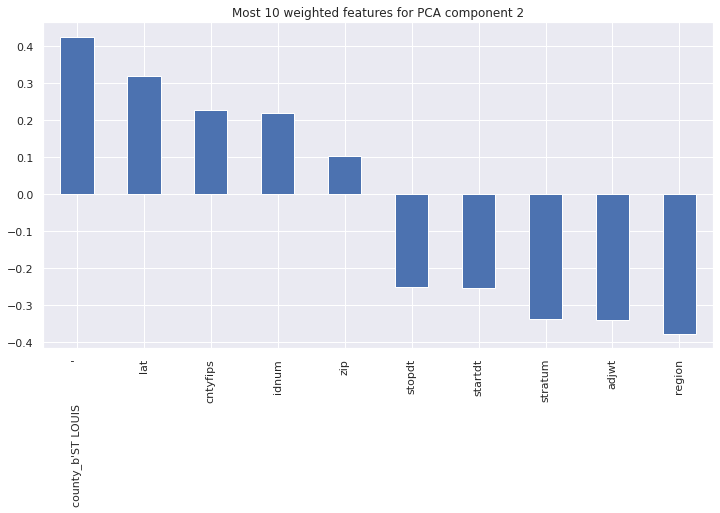

county_b'ST LOUIS            '    0.4232
lat                               0.3187
cntyfips                          0.2257
idnum                             0.2168
zip                               0.1012
stopdt                           -0.2523
startdt                          -0.2547
stratum                          -0.3380
adjwt                            -0.3400
region                           -0.3778
Name: 1, dtype: float64


In [ ]:
for i in np.arange(0, 3, 1):
    res = pca_results(features_final, pca, i, 5)
    print(res)